In [4]:
!git clone https://github.com/Keshav-Bharadwaj/DeepFreq.git

Cloning into 'DeepFreq'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 328 (delta 10), reused 10 (delta 4), pack-reused 300
Receiving objects: 100% (328/328), 44.14 MiB | 20.02 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [5]:
%cd /content/DeepFreq/

/content/DeepFreq


In [6]:
!pip install cplxmodule
!pip install torch-summary

In [7]:
import os
import numpy as np
import torch
import util
import matplotlib.pyplot as plt
from data import fr
%matplotlib inline

In [ ]:
#Script for training of model
!python3 train.py \
  --signal_dim 50\
	--n_training 200000 \
	--n_epochs_fr 200  \
	--n_epochs_fc 100 \
	--output_dir /checkpoint/experiment_name \
	

In [10]:
#Loading the path of the save weights and required directory
fr_path = 'pretrained_models/DeepFreq/frequency_representation_module.pth'
fc_path ='pretrained_models/DeepFreq/frequency_counting_module.pth'
data_dir = 'test_dataset'

In [11]:
#To run the module with GPU setting
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
#load models
fr_module, _, _, _, _ = util.load(fr_path, 'fr', device)
fc_module, _, _, _, _ = util.load(fc_path, 'fc', device)
fr_module.cpu()
fr_module.eval()
fc_module.cpu()
fc_module.eval()
xgrid = np.linspace(-0.5, 0.5, fr_module.fr_size, endpoint=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")


In [13]:
#Load dataset
f = np.load(os.path.join(data_dir, 'f.npy'))
signal_0dB = np.load(os.path.join(data_dir, '0.0dB.npy'))
signal_5dB = np.load(os.path.join(data_dir, '5.0dB.npy'))
signal_10dB = np.load(os.path.join(data_dir, '10.0dB.npy'))
signal_15dB = np.load(os.path.join(data_dir, '15.0dB.npy'))
signal_20dB = np.load(os.path.join(data_dir, '20.0dB.npy'))
signal_25dB = np.load(os.path.join(data_dir, '25.0dB.npy'))
signal_30dB = np.load(os.path.join(data_dir, '30.0dB.npy'))
signal_35dB = np.load(os.path.join(data_dir, '35.0dB.npy'))
signal_40dB = np.load(os.path.join(data_dir, '40.0dB.npy'))
signal_45dB = np.load(os.path.join(data_dir, '45.0dB.npy'))
signal_50dB = np.load(os.path.join(data_dir, '50.0dB.npy'))
signal_infdB = np.load(os.path.join(data_dir, 'infdB.npy'))
nfreq = np.sum(f >= -0.5, axis=1)

In [14]:
#Compatability changes for Cplx Module
from cplxmodule.nn import RealToCplx
from cplxmodule import cplx
def SlicedNumpytoComplex(inputx):
  signal_0dB = torch.from_numpy(inputx)
  noisy_signal = RealToCplx()(signal_0dB.permute(1,0))  # switch axes to move real/imag to end
  return cplx.Cplx.permute(noisy_signal,1,0)
  

In [50]:
#Frequency estimations and model oder(peak search) finding for exemplar dataset
idx = 8 # Example from the dataset
with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_0dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
    fr_5dB = fr_module(SlicedNumpytoComplex(signal_5dB[idx]))
    nestimate_5dB = fc_module(fr_5dB.real).numpy().round()
    fr_10dB = fr_module(SlicedNumpytoComplex(signal_10dB[idx]))
    nestimate_10dB = fc_module(fr_10dB.real).numpy().round()
    fr_15dB = fr_module(SlicedNumpytoComplex(signal_15dB[idx]))
    nestimate_15dB = fc_module(fr_15dB.real).numpy().round()
    fr_20dB = fr_module(SlicedNumpytoComplex(signal_20dB[idx]))
    nestimate_20dB = fc_module(fr_20dB.real).numpy().round()
    fr_25dB = fr_module(SlicedNumpytoComplex(signal_25dB[idx]))
    nestimate_25dB = fc_module(fr_25dB.real).numpy().round()
    fr_30dB = fr_module(SlicedNumpytoComplex(signal_30dB[idx]))
    nestimate_30dB = fc_module(fr_30dB.real).numpy().round()
    fr_35dB = fr_module(SlicedNumpytoComplex(signal_35dB[idx]))
    nestimate_35dB = fc_module(fr_35dB.real).numpy().round()
    fr_40dB = fr_module(SlicedNumpytoComplex(signal_40dB[idx]))
    nestimate_40dB = fc_module(fr_40dB.real).numpy().round()
    fr_45dB = fr_module(SlicedNumpytoComplex(signal_45dB[idx]))
    nestimate_45dB = fc_module(fr_45dB.real).numpy().round()
    fr_50dB = fr_module(SlicedNumpytoComplex(signal_50dB[idx]))
    nestimate_50dB = fc_module(fr_50dB.real).numpy().round()
    fr_infdB = fr_module(SlicedNumpytoComplex(signal_infdB[idx]))
    nestimate_infdB = fc_module(fr_infdB.real).numpy().round()
fr_0dB = fr_0dB.numpy() 
fr_5dB = fr_5dB.numpy()
fr_10dB = fr_10dB.numpy() 
fr_15dB = fr_15dB.numpy()
fr_20dB = fr_20dB.numpy() 
fr_25dB = fr_25dB.numpy() 
fr_30dB = fr_30dB.numpy()
fr_35dB = fr_35dB.numpy() 
fr_40dB = fr_40dB.numpy()
fr_45dB = fr_45dB.numpy()
fr_50dB = fr_50dB.numpy()
fr_infdB = fr_infdB.numpy()

In [51]:
#True frequency identification from frequency module
f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
f_estimate_5dB = fr.find_freq(fr_5dB.real, nestimate_0dB, xgrid)
f_estimate_10dB = fr.find_freq(fr_10dB.real, nestimate_10dB, xgrid)
f_estimate_15dB = fr.find_freq(fr_15dB.real, nestimate_15dB, xgrid)
f_estimate_20dB = fr.find_freq(fr_20dB.real, nestimate_20dB, xgrid)
f_estimate_25dB = fr.find_freq(fr_25dB.real, nestimate_25dB, xgrid)
f_estimate_30dB = fr.find_freq(fr_30dB.real, nestimate_30dB, xgrid)
f_estimate_35dB = fr.find_freq(fr_35dB.real, nestimate_35dB, xgrid)
f_estimate_40dB = fr.find_freq(fr_40dB.real, nestimate_40dB, xgrid)
f_estimate_45dB = fr.find_freq(fr_45dB.real, nestimate_45dB, xgrid)
f_estimate_50dB = fr.find_freq(fr_50dB.real, nestimate_50dB, xgrid)
f_estimate_infdB = fr.find_freq(fr_infdB.real, nestimate_infdB, xgrid)

In [17]:
def error(f,f_model):
  true_freq = np.array(f)
  estimated_freq = np.array(f_model)
  return(np.sum(np.abs(np.subtract(true_freq,estimated_freq))))

In [18]:
#Percentage error for model oder counting
def counterror(freq,nestimate_0dB):
  maxfreq = max(freq,nestimate_0dB)
  return(np.abs(freq - nestimate_0dB)/maxfreq)
  

In [ ]:
#FNR, model order calculation for signal_0dB
from data.loss import fnr
temp = list()
p = list()
fnr_val111 = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_0dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p1 = np.mean(np.array(p))*100
temp_mean1 = np.mean(np.array(temp))
e1 = (temp_mean1/(np.max(temp)))*100
fnr_val1 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_5dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_5dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p2 = np.mean(np.array(p))*100
temp_mean2 = np.mean(np.array(temp))
e2 = (temp_mean2/(np.max(temp)))*100
fnr_val2 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_10dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_10dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p3 = np.mean(np.array(p))*100
temp_mean3 = np.mean(np.array(temp))
e3 = (temp_mean3/(np.max(temp)))*100
fnr_val3 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_15dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_15dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p4 = np.mean(np.array(p))*100
temp_mean4 = np.mean(np.array(temp))
e4 = (temp_mean4/(np.max(temp)))*100
fnr_val4 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_20dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_20dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p5 = np.mean(np.array(p))*100
temp_mean5 = np.mean(np.array(temp))
e5 = (temp_mean5/(np.max(temp)))*100
fnr_val5 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_25dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_25dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p6 = np.mean(np.array(p))*100
temp_mean6 = np.mean(np.array(temp))
e6 = (temp_mean6/(np.max(temp)))*100
fnr_val6 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_30dB
temp = list()
fnr_val111 = list()
p =list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_30dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p7 = np.mean(np.array(p))*100
temp_mean7 = np.mean(np.array(temp))
e7 = (temp_mean7/(np.max(temp)))*100
fnr_val7 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_35dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_35dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p8 = np.mean(np.array(p))*100
temp_mean8 = np.mean(np.array(temp))
e8 = (temp_mean8/(np.max(temp)))*100
fnr_val8 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_40dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_40dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p9 = np.mean(np.array(p))*100
temp_mean9 = np.mean(np.array(temp))
e9 = (temp_mean9/(np.max(temp)))*100
fnr_val9 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_45dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_45dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p10 = np.mean(np.array(p))*100
temp_mean10 = np.mean(np.array(temp))
e10 = (temp_mean10/(np.max(temp)))*100
fnr_val10 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_50dB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_50dB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

p11 = np.mean(np.array(p))*100
temp_mean11 = np.mean(np.array(temp))
e11 = (temp_mean11/(np.max(temp)))*100
fnr_val11 = np.mean(np.array(fnr_val111))*100
 

In [ ]:
#FNR, model order calculation for signal_infdB
temp = list()
fnr_val111 = list()
p = list()
for idx in range(0,999):
  with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_infdB[idx]))
    nestimate_0dB = fc_module(fr_0dB.real).numpy().round()
  fr_0dB = fr_0dB.numpy()
  if nestimate_0dB > 10:
    nestimate_0dB = np.array([10]) 
  f_estimate_0dB = fr.find_freq(fr_0dB.real, nestimate_0dB, xgrid)
  temp.append(error(f[idx],f_estimate_0dB))
  fnr_val111.append(fnr(f_estimate_0dB,f[idx][np.newaxis,:], signal_dim=50))
  p.append(counterror(nfreq[idx],nestimate_0dB))

pinf = np.mean(np.array(p))*100
temp_meaninf = np.mean(np.array(temp))
einf = (temp_meaninf/(np.max(temp)))*100
fnr_valinf = np.mean(np.array(fnr_val111))*100
 

Text(0, 0.5, 'Absolute difference')

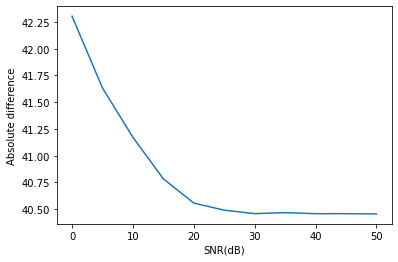

In [31]:
#Chamfer error plot
fig, ax = plt.subplots()
ax.plot(np.arange(0,55,5),[temp_mean1,temp_mean2,temp_mean3,temp_mean4,temp_mean5,temp_mean6,temp_mean7,temp_mean8,temp_mean9,temp_mean10,temp_mean11])
ax.set_xlabel('SNR(dB)')
ax.set_ylabel('Absolute difference')

Text(0, 0.5, 'Error Percentage')

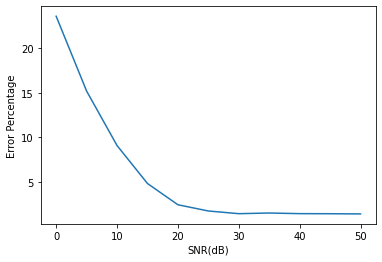

In [32]:
#Model oder error percentage calculation plot
fig, ax = plt.subplots()
ax.plot(np.arange(0,55,5),[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11])
ax.set_xlabel('SNR(dB)')
ax.set_ylabel('Error Percentage')

Text(0, 0.5, 'FNR%')

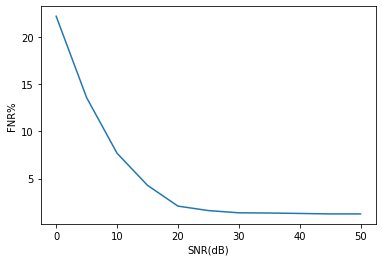

In [33]:
#FNR% plot 
fig, ax = plt.subplots()
ax.plot(np.arange(0,55,5),[fnr_val1,fnr_val2,fnr_val3,fnr_val4,fnr_val5,fnr_val6,fnr_val7,fnr_val8,fnr_val9,fnr_val10,fnr_val11])
ax.set_xlabel('SNR(dB)')
ax.set_ylabel('FNR%')

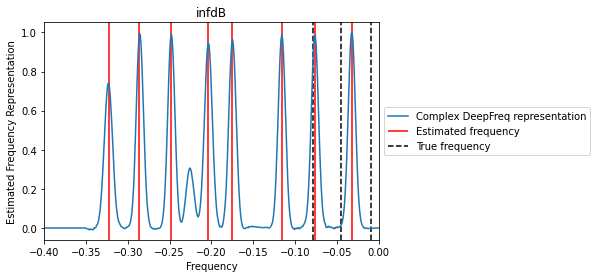

In [38]:
#Frequency estimation Graph for SNR close to inf dB
idx = 800
fig, ax = plt.subplots()
ax.plot(xgrid, fr_infdB[0].real, label='Complex DeepFreq representation')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
f_model = f_estimate_infdB[f_estimate_infdB > -1]
ax.vlines(f_model, ymin=ylim[0], ymax=ylim[1], color='r', label='Estimated frequency')
ax.vlines(ff, linestyle='--', ymin=ylim[0], ymax=ylim[1], color='k', label='True frequency')
ax.set_ylim(ylim)
ax.set_xlim(-0.4, 0.0)
ax.set_xlabel('Frequency')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_title('infdB')
ax.legend( loc='center left', bbox_to_anchor=(1, 0.5))

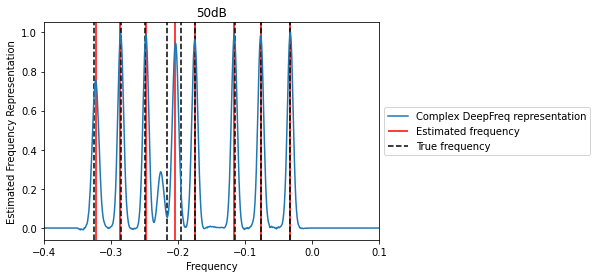

In [39]:
#Frequency estimation Graph for SNR 50 dB
idx = 8
fig, ax = plt.subplots()
ax.plot(xgrid, fr_50dB[0].real, label='Complex DeepFreq representation')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
f_model = f_estimate_50dB[f_estimate_50dB > -1] #Frequencies above which estimations are done
ax.vlines(f_model, ymin=ylim[0], ymax=ylim[1], color='r', label='Estimated frequency')
ax.vlines(ff, linestyle='--', ymin=ylim[0], ymax=ylim[1], color='k', label='True frequency')
ax.set_ylim(ylim)
ax.set_xlim(-0.4, 0.1)
#ax.set_xlim(-1, 1)
ax.set_xlabel('Frequency')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_title('50dB')
ax.legend( loc='center left', bbox_to_anchor=(1, 0.5))

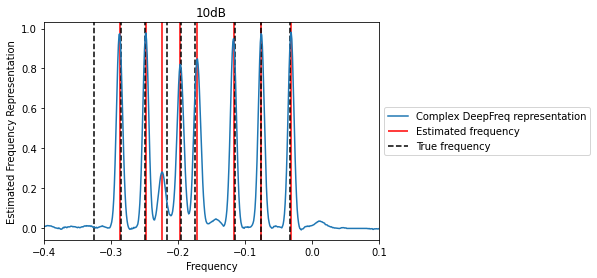

In [40]:
#Frequency estimation Graph for SNR 10 dB
idx = 8
fig, ax = plt.subplots()
ax.plot(xgrid, fr_10dB[0].real, label='Complex DeepFreq representation')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
f_model = f_estimate_10dB[f_estimate_10dB > -1]
ax.vlines(f_model, ymin=ylim[0], ymax=ylim[1], color='r', label='Estimated frequency')
ax.vlines(ff, linestyle='--', ymin=ylim[0], ymax=ylim[1], color='k', label='True frequency')
ax.set_ylim(ylim)
ax.set_xlim(-0.4, 0.1)
ax.set_xlabel('Frequency')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_title('10dB')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

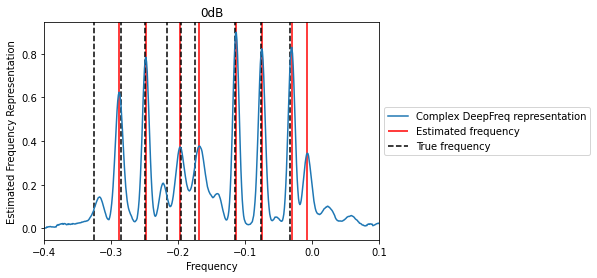

In [52]:
#Frequency estimation Graph for SNR 0 dB
fig, ax = plt.subplots()
ax.plot(xgrid, fr_0dB[0].real, label='Complex DeepFreq representation')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
f_model = f_estimate_0dB[f_estimate_0dB > -1]
ax.vlines(f_model, ymin=ylim[0], ymax=ylim[1], color='r', label='Estimated frequency')
ax.vlines(ff, linestyle='--', ymin=ylim[0], ymax=ylim[1], color='k', label='True frequency')
ax.set_ylim(ylim)
ax.set_xlim(-0.4, 0.1)
ax.set_xlabel('Frequency')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_title('0dB')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [42]:
idx = 13 #example dataset
with torch.no_grad():
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_0dB[idx])).numpy()[0]
    fr_10dB = fr_module(SlicedNumpytoComplex(signal_10dB[idx])).numpy()[0]
    fr_50dB = fr_module(SlicedNumpytoComplex(signal_50dB[idx])).numpy()[0]
    fr_infdB = fr_module(SlicedNumpytoComplex(signal_infdB[idx])).numpy()[0]

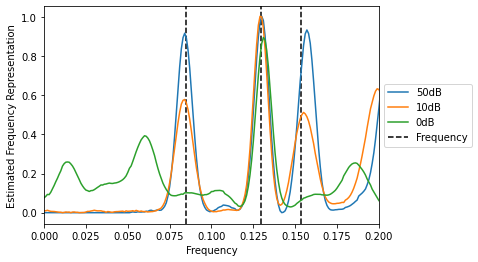

In [43]:
#Frequency estimation performance for various SNR
fig, ax = plt.subplots()
ax.plot(xgrid, fr_50dB.real, label='50dB')
ax.plot(xgrid, fr_10dB.real, label='10dB')
ax.plot(xgrid, fr_0dB.real, label='0dB')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0., 0.2)
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [46]:
#Output previous tested schemes of MUSIC and periodogram
signal_0dB_c = signal_0dB[:, 0]+ 1j * signal_0dB[:, 1]
signal_10dB_c = signal_10dB[:, 0]+ 1j * signal_10dB[:, 1]
signal_50dB_c = signal_50dB[:, 0]+ 1j * signal_50dB[:, 1]
signal_infdB_c = signal_infdB[:, 0]+ 1j * signal_infdB[:, 1]
idx = 13
with torch.no_grad():
    fr_10dB = fr_module(SlicedNumpytoComplex(signal_10dB[idx]))[0]
    fr_50dB = fr_module(SlicedNumpytoComplex(signal_50dB[idx]))[0]
    fr_0dB = fr_module(SlicedNumpytoComplex(signal_0dB[idx]))[0]
    fr_infdB = fr_module(SlicedNumpytoComplex(signal_infdB[idx]))[0]
music_fr_0dB = fr.music(signal_0dB_c[idx][None], xgrid, nfreq[idx][None])[0]
periodogram_0dB = fr.periodogram(signal_0dB_c[idx][None], xgrid)[0]
music_fr_10dB = fr.music(signal_10dB_c[idx][None], xgrid, nfreq[idx][None])[0]
periodogram_10dB = fr.periodogram(signal_10dB_c[idx][None], xgrid)[0]
music_fr_50dB = fr.music(signal_50dB_c[idx][None], xgrid, nfreq[idx][None])[0]
periodogram_50dB = fr.periodogram(signal_50dB_c[idx][None], xgrid)[0]
music_fr_infdB = fr.music(signal_infdB_c[idx][None], xgrid, nfreq[idx][None])[0]
periodogram_infdB = fr.periodogram(signal_infdB_c[idx][None], xgrid)[0]

fr_0dB = fr_0dB.cpu().numpy()
fr_10dB = fr_10dB.cpu().numpy()
fr_50dB = fr_50dB.cpu().numpy()
fr_infdB = fr_infdB.cpu().numpy()

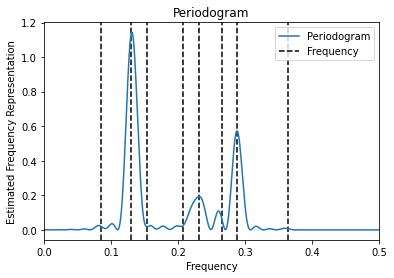

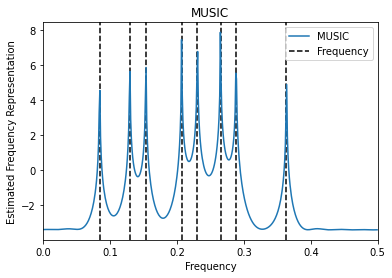

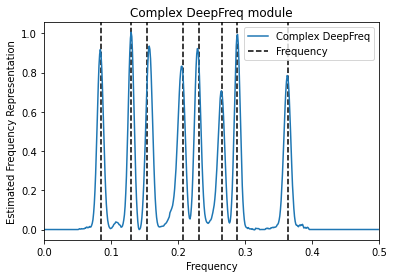

In [47]:
#Frequency estimation performance for Periodogram,MUSIC, Complex DeepFreq for SNR=infdB
fig, ax = plt.subplots()
ax.plot(xgrid, periodogram_infdB, label='Periodogram')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('Periodogram')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(xgrid, music_fr_infdB, label='MUSIC')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('MUSIC')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(xgrid, fr_infdB.real, label='Complex DeepFreq')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('Complex DeepFreq module')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()



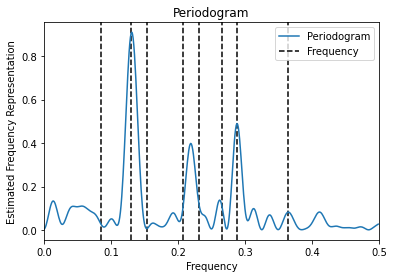

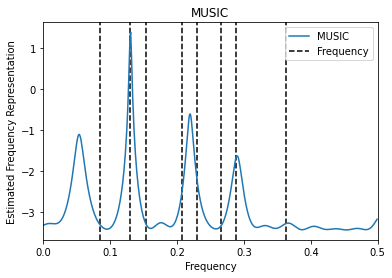

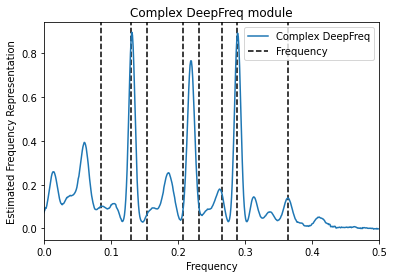

In [48]:
#Frequency estimation performance for Periodogram, MUSIC, Complex DeepFreq for SNR=0dB
fig, ax = plt.subplots()
ax.plot(xgrid, periodogram_0dB, label='Periodogram')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('Periodogram')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(xgrid, music_fr_0dB, label='MUSIC')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('MUSIC')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(xgrid, fr_0dB.real, label='Complex DeepFreq')
ylim = ax.get_ylim()
ff = f[idx][f[idx] > -1]
ax.vlines(ff, ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', label='Frequency')
ax.set_ylim(ylim)
ax.set_xlim(0, 0.5)
ax.set_title('Complex DeepFreq module')
ax.set_ylabel('Estimated Frequency Representation')
ax.set_xlabel('Frequency')
ax.legend()
plt.show()